In [2]:
# Automatically update imports
%load_ext autoreload
%autoreload 2

# Workaround for some autocomplete bug
%config Completer.use_jedi = False

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from data import train
from data import y, X, categorical, numerical

In [4]:
train

,attribute2,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,meanAge,gender,meanEducation,maritalStatus,plus,...,attribute1_2.0,attribute1_3.0,attribute1_4.0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
1404,4.850075,3.082306,4.281904,3.791205,6.480146,7.813408,1.380382,11.580054,2.201123,1.650476,...,0,1,0,0,0,0,0,1,0,0
2184,2.910045,0.094506,1.709888,1.637009,0.059201,7.600842,0.000000,10.896544,1.410243,1.856786,...,0,1,0,0,0,0,0,0,1,0
796,4.850075,0.217541,0.994800,1.103595,0.193577,7.016162,0.849466,11.865126,0.987170,0.866500,...,0,1,0,0,0,0,0,0,1,0
25,3.880060,0.327738,1.566200,1.306937,0.509315,6.876952,0.000000,10.805739,1.645284,1.624688,...,0,1,0,0,0,1,0,0,0,0
1745,4.850075,0.389791,2.506703,2.351882,0.265934,8.667627,1.162427,11.653248,3.117380,1.476989,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,2.910045,0.148356,0.953555,0.978077,0.487702,6.334035,2.760765,10.170108,1.480755,1.856786,...,1,0,0,0,0,0,1,0,0,0
1814,3.395053,0.818453,1.120767,1.021958,0.853244,8.293363,1.310193,10.561266,2.467926,1.066959,...,1,0,0,0,0,0,0,0,0,1
1428,3.880060,0.077031,1.148068,1.164598,0.765853,10.134456,1.840510,13.983898,4.935852,4.332500,...,0,1,0,0,0,0,0,1,0,0
2441,3.880060,0.342360,1.135136,1.255794,0.270633,8.664960,0.828229,11.017617,3.701889,0.722083,...,0,1,0,0,1,0,0,0,0,0


## Looking for Correlation Among numerical Indicators

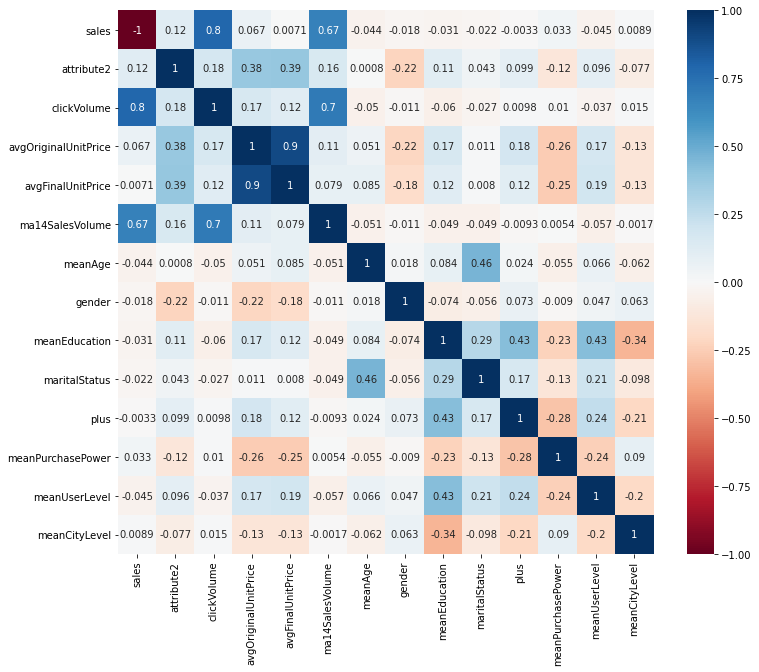

In [5]:
import seaborn as sns
#Plot correlation matrix for numerical indicators
cols = [y, *numerical] # Select numerical columns
corr = train[cols].corr()

corr.iloc[0, 0] = -1.0 
corr.iloc[-1, -1] = 1.0 

# Plot correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=corr, cmap='RdBu');

### From colour map above, we see that there is a relatively strong correlation between ma14SalesVolumne/clickVolume and Sales

## Multiple Linear Regression

In [6]:
import statsmodels.formula.api as smf



In [7]:
results_mul = smf.ols('sales ~ ma14SalesVolume + clickVolume ', data=train).fit()
print(results_mul.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     1925.
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:37:15   Log-Likelihood:                -10950.
No. Observations:                1992   AIC:                         2.191e+04
Df Residuals:                    1989   BIC:                         2.192e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2100      1.641     

### From above, the adjusted r-squared value is relatively high at 0.659

In [8]:
# RSE for regression on clickVolumne and ma14SalesVolume
RSS= sum((results_mul.predict(train) - train['sales'])**2)
sigma_hat=np.sqrt(RSS/(len(train)-1-2))
sigma_hat #RSE for multiple linear regression on clickVolumne and ma14SalesVolume

59.06903846715225

In [9]:
from data import validation
from sklearn.metrics import mean_squared_error, r2_score

validation_X = validation[['ma14SalesVolume','clickVolume']]
sales_validation=validation['sales']
sales_pred = results_mul.predict(validation_X)
# results_mul.fit(, diabetes_y_train)

In [10]:
# # The coefficients

# The mean squared error
print('Mean squared error for multiple linear regression: %.2f'
      % mean_squared_error(sales_validation, sales_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(sales_validation, sales_pred))

Mean squared error for multiple linear regression: 2136.17
Coefficient of determination: 0.77


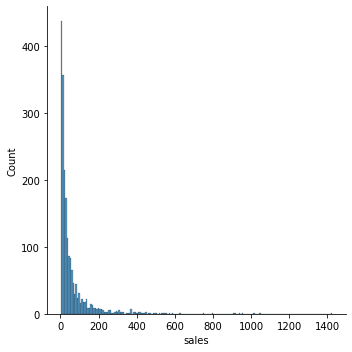

In [11]:
sns.displot(train, x="sales")

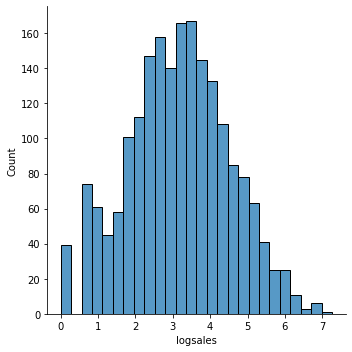

In [18]:
#Log transformation of sales
train["logsales"]=np.log(train.sales)
sns.displot(train, x="logsales")


### From the histogram above, we can see that regressing against the log of sales might result in a better fit

In [19]:
#Regression of ma14SalesVolume and clickVolume variables against 
results_mul_logsales = smf.ols('logsales ~ ma14SalesVolume + clickVolume ', data=train).fit()
print(results_mul_logsales.summary())


                            OLS Regression Results                            
Dep. Variable:               logsales   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     818.1
Date:                Wed, 31 Mar 2021   Prob (F-statistic):          5.40e-260
Time:                        13:55:45   Log-Likelihood:                -2821.9
No. Observations:                1992   AIC:                             5650.
Df Residuals:                    1989   BIC:                             5667.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.5171      0.028     

### From above, the adjusted r-squared value is relatively low at 0.451. The condition number of 3.22 is low which indicates that there is low multicollinearity

## Calculating MSE value for multiple linear regression with the log transformation of sales

In [26]:
validation_X = validation[['ma14SalesVolume','clickVolume']]
sales_validation=validation['sales']
sales_pred_logsales = results_mul_logsales.predict(validation_X)

# converting sales back to original form
sales_pred_log_converted = np.exp(sales_pred_logsales)
sales_pred_log_converted


1862    15.598287
2487    18.012858
143     15.943788
486     64.455725
509     14.920814
          ...    
1592    33.411210
782     26.308582
1054    24.239318
762     13.908430
2292    19.098669
Length: 499, dtype: float64

In [28]:
# The mean squared error
print('Mean squared error for multiple linear regression using log sales: %.2f'
      % mean_squared_error(sales_validation, sales_pred_log_converted))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(sales_validation, sales_pred_log_converted))

Mean squared error for multiple linear regression using log sales: 5646778.27
Coefficient of determination: -617.51


## Analysing Interaction between Variables

In [29]:
results_mul_I = smf.ols('sales ~ ma14SalesVolume + clickVolume + ma14SalesVolume:clickVolume', data=train).fit()
print(results_mul_I.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     1304.
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:06:50   Log-Likelihood:                -10939.
No. Observations:                1992   AIC:                         2.189e+04
Df Residuals:                    1988   BIC:                         2.191e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

###  $R^{2}$ drop from 0.663 to 0.659, not significantly. So it is better not to include the interaction between ma14SalesVolume and clickVolume .

In [59]:
results_mul_cV = smf.ols('sales ~ clickVolume ', data=train).fit()
print(results_mul_cV.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     3461.
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:35:13   Log-Likelihood:                -11019.
No. Observations:                1992   AIC:                         2.204e+04
Df Residuals:                    1990   BIC:                         2.205e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.2193      1.616      3.848      

In [60]:
results_mul_ma = smf.ols('sales ~ ma14SalesVolume ', data=train).fit()
print(results_mul_ma.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1642.
Date:                Wed, 31 Mar 2021   Prob (F-statistic):          2.85e-262
Time:                        18:40:07   Log-Likelihood:                -11423.
No. Observations:                1992   AIC:                         2.285e+04
Df Residuals:                    1990   BIC:                         2.286e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.3216      2.059     

## Plotting Cross Validation Prediction assuming linear relation between ma14SalesVolume, clickVolume and sales

In [66]:
train_X = train[['ma14SalesVolume','clickVolume']]
sales_test=validation['sales']
sales_test = np.asmatrix(sales_test)
train_X=np.asmatrix(train_X)
train_X

matrix([[6.48014611, 3.08230601],
        [0.05920087, 0.09450551],
        [0.19357745, 0.21754098],
        ...,
        [0.76585253, 0.0770309 ],
        [0.27063255, 0.34235957],
        [1.38229335, 1.9129341 ]])

In [73]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt



# sns.lmplot(sales_validation, sales_pred, size=7)
        
# Plotting the diagonal line
# line_coords = np.arange(df_results.min().min(), df_results.max().max())
# plt.plot(line_coords, line_coords,  # X and y points
#              color='darkorange', linestyle='--')
# plt.title('Actual vs. Predicted')
# plt.show()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
# predicted = cross_val_predict(results_mul,train_X , sales_test, cv=10)

# predicted
# ax = sns.scatterplot(sales_test, predicted, edgecolors=(0, 0, 0))
# ax.plot([sales_train.min(),sales_train.max()], [sales_train.min(), sales_train.max()], 'k--', lw=4)
# ax.xlabel('Measured')
# ax.ylabel('Predicted')
# plt.show()

## Let us assume that there is a non-linear relationship between Sales and ma14SalesVolume, clickVolume

In [70]:
results_p2 = smf.ols('sales ~ ma14SalesVolume + clickVolume + I(ma14SalesVolume**2) + I(clickVolume**2)', data=train).fit()
print(results_p2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     1106.
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:27:25   Log-Likelihood:                -10856.
No. Observations:                1992   AIC:                         2.172e+04
Df Residuals:                    1987   BIC:                         2.175e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [71]:
validation_X = validation[['ma14SalesVolume','clickVolume']]
sales_validation=validation['sales']
sales_pred_salesp2 = results_p2.predict(validation_X)


In [72]:
# The mean squared error
print('Mean squared error for polynomial regression of degree 2: %.2f'
      % mean_squared_error(sales_validation, sales_pred_salesp2))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(sales_validation, sales_pred_salesp2))

Mean squared error for polynomial regression of degree 2: 2133.58
Coefficient of determination: 0.77
